# Heart disease analysis with Naive Bayes theorem

In [ ]:
# loading the required libraries

In [1]:
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
from matplotlib import pyplot as plt

In [3]:
import seaborn as sns # For creating plots

In [4]:
heart =pd.read_csv('heart 2.csv')

In [5]:
#having a glance at the  on first five records
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


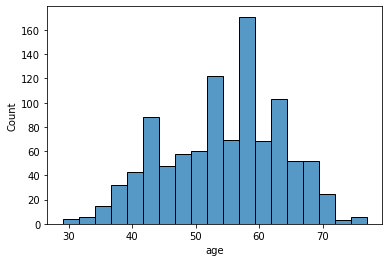

In [6]:
# making histogram
sns.histplot(heart['age'])
plt.show()

In [7]:
# lookig at the number of rows and columns in the dataset
heart.shape

(1025, 14)

In [8]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [9]:
# Let's look at stats of the non-object features
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
# checking the number male and female patients
heart['sex'].value_counts()

1    713
0    312
Name: sex, dtype: int64

In [11]:
heart['sex'].value_counts().keys()

Int64Index([1, 0], dtype='int64')

In [12]:
heart['sex'].value_counts().values

array([713, 312], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

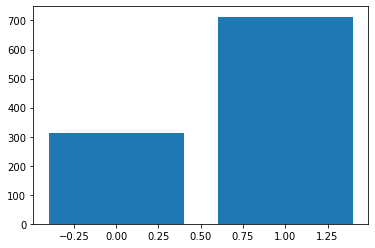

In [13]:
#making bar plot w.r.t sex 
plt.bar(list(heart['sex'].value_counts().keys()),list(heart['sex'].value_counts()))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

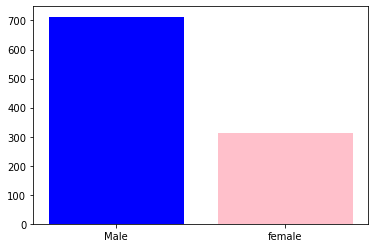

In [14]:
# giving the names to bins
plt.bar(list(("Male","female")),list(heart['sex'].value_counts()),color=["blue","pink"])
plt.show

In [15]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [16]:
heart['cp'].value_counts()

0    497
2    284
1    167
3     77
Name: cp, dtype: int64

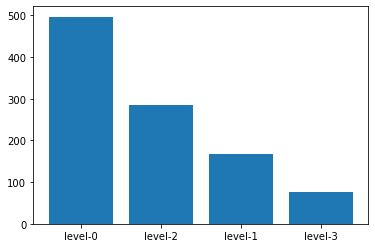

In [17]:
# making bar plot w.r.t cholestrol level of patients
plt.bar(list(("level-0","level-2","level-1","level-3")),list(heart['cp'].value_counts()))
plt.show()

In [18]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


C:\Users\H_7\.conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


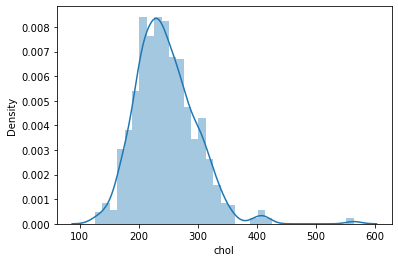

In [19]:
# making histogram
sns.distplot(heart['chol'])
plt.show()

In [20]:
heart['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

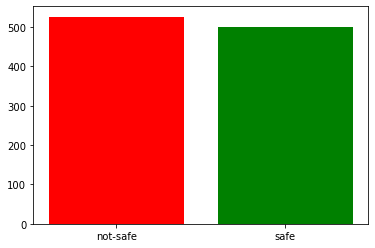

In [21]:
# making bar plot w.r.t the target
plt.bar(list(("not-safe","safe")),list(heart['target'].value_counts()),color=["red","green"])
plt.show()

In [22]:
x = heart[['age']]
y = heart[['target']]

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [25]:
from sklearn.naive_bayes import MultinomialNB

In [26]:
mnb=MultinomialNB()

In [27]:
mnb.fit(x_train,y_train)

C:\Users\H_7\.conda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [28]:
y_pred=mnb.predict(x_test)

In [29]:
y_test.head(),y_pred[0:5]

(     target
 807       1
 27        0
 77        0
 406       1
 886       0,
 array([1, 1, 1, 1, 1], dtype=int64))

In [30]:
from sklearn.metrics import confusion_matrix  

In [31]:
confusion_matrix(y_test,y_pred)

array([[  0, 145],
       [  0, 163]], dtype=int64)

In [32]:
(76+99)/(76+99+64+69)

0.5681818181818182

In [33]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [34]:
x=heart[['age','trestbps','chol']]

In [35]:
x.head()

,age,trestbps,chol
0,52,125,212
1,53,140,203
2,70,145,174
3,61,148,203
4,62,138,294


In [36]:
y=heart[['target']]

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [39]:
from sklearn.naive_bayes import GaussianNB

In [40]:
gnb=GaussianNB()

In [41]:
gnb.fit(x_train,y_train)

C:\Users\H_7\.conda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [42]:
y_pred=gnb.predict(x_test)

In [43]:
y_test.head(),y_pred[0:5]

(     target
 807       1
 27        0
 77        0
 406       1
 886       0,
 array([1, 0, 0, 0, 0], dtype=int64))

In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
confusion_matrix(y_test,y_pred)

array([[100,  45],
       [ 68,  95]], dtype=int64)

In [46]:
(100+95)/(100+95+68+45)

0.6331168831168831